# In this notebook we explore the some regression techniques

## 1. Objectives
1. Multiple regression analysis
2. Discriminant analysis
3. Multivariate analysis of  (MANOVA)
4. Factor analysis 
5. Cluster analysis

In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Regression analysis

## 2.1. Simple Linear regression

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Calculate the petal length based on the petal width of Irises

In [215]:
data = sns.load_dataset('iris')
print(data.shape)
data = pd.DataFrame(data)
data

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [216]:
data_1 = data[['petal_width','petal_length']]
data_1

,petal_width,petal_length
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4
...,...,...
145,2.3,5.2
146,1.9,5.0
147,2.0,5.2
148,2.3,5.4


In [217]:
data_1.corr()

,petal_width,petal_length
petal_width,1.000000,0.962865
petal_length,0.962865,1.000000


In [218]:
x = data['petal_width']
y = data['petal_length']

### Splitting data for testing and training

In [219]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.4, random_state =12345 )
x_train

109    2.5
143    2.3
124    2.1
93     1.0
125    1.8
      ... 
34     0.2
101    1.9
126    1.8
129    1.6
29     0.2
Name: petal_width, Length: 90, dtype: float64

### Training

In [220]:
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)

In [221]:
LR = LinearRegression()
LR.fit(x_train,y_train)
C = LR.intercept_
M = LR.coef_
print(M,C)

[[2.27774233]] [1.04646332]


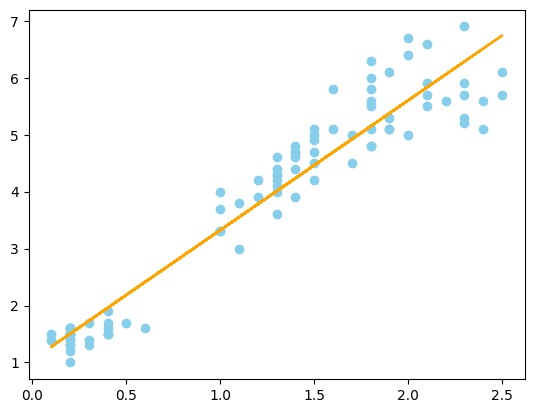

In [222]:
y_pred_train = LR.predict(x_train)
plt.scatter(x_train,y_train, color= 'skyblue')
plt.plot(x_train,y_pred_train, color='orange')
plt.show()

### Testing

In [223]:
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

y_pred_test = LR.predict(x_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_pred_test, y_test ))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_pred_test, y_test))

Mean squared error: 0.19
Coefficient of determination: 0.94


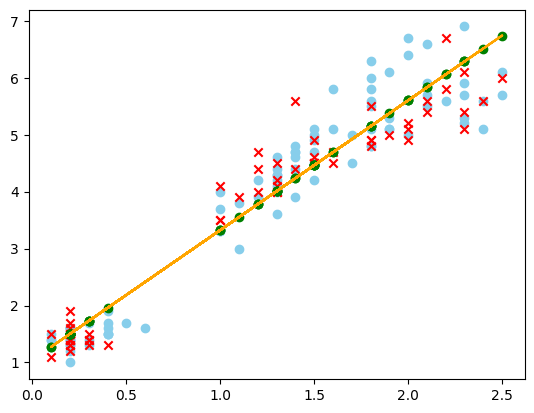

In [224]:
plt.scatter(x_train,y_train, color= 'skyblue')
plt.plot(x_train,y_pred_train, color='orange')
plt.scatter(x_test,y_test,color = 'red', marker='x', label = 'actual')
plt.scatter(x_test,y_pred_test, color = 'green', marker='o', label= 'predicted')
plt.show()

## 2.2 Multiple linear regression

In [225]:
df_2 = data[['species','petal_width','petal_length']]
df_2

,species,petal_width,petal_length
0,setosa,0.2,1.4
1,setosa,0.2,1.4
2,setosa,0.2,1.3
3,setosa,0.2,1.5
4,setosa,0.2,1.4
...,...,...,...
145,virginica,2.3,5.2
146,virginica,1.9,5.0
147,virginica,2.0,5.2
148,virginica,2.3,5.4


In [226]:
print(df_2.species.unique())

['setosa' 'versicolor' 'virginica']


In [227]:
# convert the species in to integers for regression
df_2.loc[df_2['species']=='setosa','species'] = 1
df_2.loc[df_2['species']=='versicolor','species'] =2
df_2.loc[df_2['species']== 'virginica','species'] =3
df_2['species'].astype(int)
df_2.species.unique()

array([1, 2, 3], dtype=object)

In [228]:
df_2

,species,petal_width,petal_length
0,1,0.2,1.4
1,1,0.2,1.4
2,1,0.2,1.3
3,1,0.2,1.5
4,1,0.2,1.4
...,...,...,...
145,3,2.3,5.2
146,3,1.9,5.0
147,3,2.0,5.2
148,3,2.3,5.4


In [229]:
# checking coorelation
df_2.groupby(['species'])[['petal_width','petal_length']].corr()

petal_width  petal_length
species                                        
1       petal_width      1.000000      0.331630
        petal_length     0.331630      1.000000
2       petal_width      1.000000      0.786668
        petal_length     0.786668      1.000000
3       petal_width      1.000000      0.322108
        petal_length     0.322108      1.000000

In [230]:
MLR = LinearRegression()
MLR.fit(df_2[['species','petal_width']],df_2['petal_length'])
length_pred = MLR.predict(df_2[['species','petal_width']])
print(length_pred)

[1.54898663 1.54898663 1.54898663 1.54898663 1.54898663 1.84901109
 1.69899886 1.54898663 1.54898663 1.3989744  1.54898663 1.54898663
 1.3989744  1.3989744  1.54898663 1.84901109 1.84901109 1.69899886
 1.69899886 1.69899886 1.54898663 1.84901109 1.54898663 1.99902332
 1.54898663 1.54898663 1.84901109 1.54898663 1.54898663 1.54898663
 1.54898663 1.84901109 1.3989744  1.54898663 1.54898663 1.54898663
 1.54898663 1.3989744  1.54898663 1.54898663 1.69899886 1.69899886
 1.54898663 2.14903554 1.84901109 1.69899886 1.54898663 1.54898663
 1.54898663 1.54898663 4.05902454 4.20903677 4.20903677 3.90901231
 4.20903677 3.90901231 4.359049   3.45897562 3.90901231 4.05902454
 3.45897562 4.20903677 3.45897562 4.05902454 3.90901231 4.05902454
 4.20903677 3.45897562 4.20903677 3.60898785 4.65907345 3.90901231
 4.20903677 3.75900008 3.90901231 4.05902454 4.05902454 4.50906122
 4.20903677 3.45897562 3.60898785 3.45897562 3.75900008 4.359049
 4.20903677 4.359049   4.20903677 3.90901231 3.90901231 3.909012

/var/folders/69/96gjdgw15hz50s9kv1v9lwsc0000gn/T/ipykernel_8143/3473305873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Predict_length'] = length_pred
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


                Predict_length  petal_length
Predict_length        1.000000      0.967645
petal_length          0.967645      1.000000


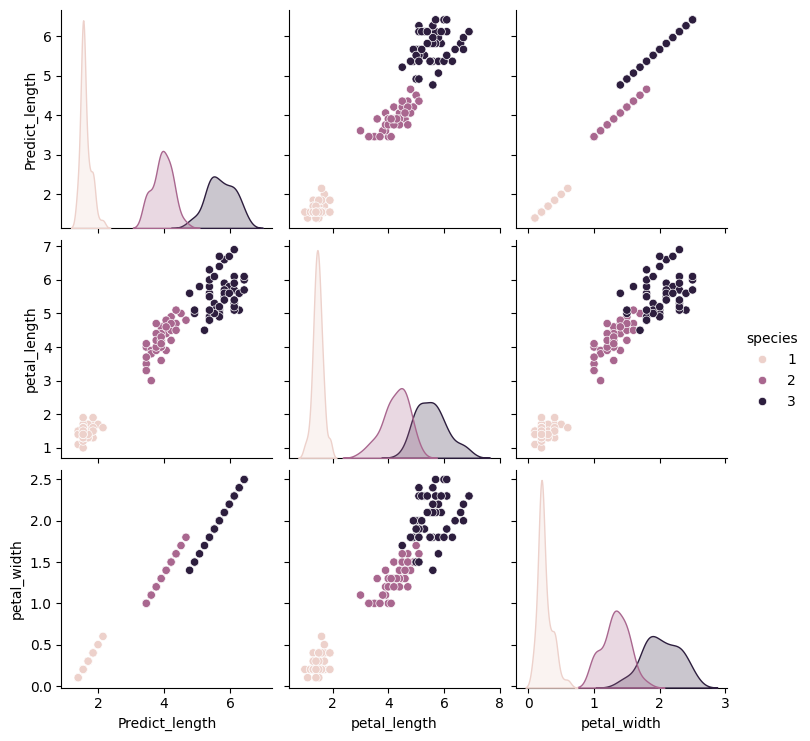

In [231]:
df_2['Predict_length'] = length_pred
sns.pairplot(data = df_2[['Predict_length', 'petal_length','petal_width','species']], hue = 'species')
print(df_2[['Predict_length', 'petal_length']].corr())

## 2.3 Logistic regression

### Given the petal width, length identify the species

In [232]:
from sklearn.linear_model import LogisticRegression

In [233]:
df_2.species.astype(str)

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: object

In [234]:
LoR = LogisticRegression(solver='liblinear', random_state=0)
x = df_2[['petal_width','petal_length']]
y = df_2['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 222)

In [235]:
x_train = np.array(x_train).reshape(-1,2)
y_train = np.array(y_train).astype(int)
x_test = np.array(x_test).reshape(-1,2)
y_test = np.array(y_test).astype(int)

In [236]:
LoR.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [237]:
print(LoR.classes_)
print(LoR.intercept_)
print(LoR.coef_)

[1 2 3]
[ 3.40037737 -1.41329962 -3.68357643]
[[-1.45772065 -1.06074588]
 [-1.2853355   0.65653676]
 [ 2.38797497 -0.05245574]]


In [238]:
LoR.predict_proba(x_test)

array([[7.00676678e-01, 2.68887740e-01, 3.04355823e-02],
       [6.88479183e-01, 2.81217527e-01, 3.03032894e-02],
       [1.10993413e-03, 2.75683066e-01, 7.23206999e-01],
       [1.80567634e-02, 5.32279589e-01, 4.49663648e-01],
       [6.38675996e-02, 5.37970373e-01, 3.98162027e-01],
       [1.60289781e-02, 5.42242366e-01, 4.41728656e-01],
       [2.31240983e-02, 3.82575269e-01, 5.94300633e-01],
       [5.69855169e-02, 5.51400080e-01, 3.91614403e-01],
       [1.21744549e-02, 3.84609565e-01, 6.03215981e-01],
       [9.26970271e-02, 5.56672202e-01, 3.50630771e-01],
       [5.97274821e-03, 4.45130408e-01, 5.48896844e-01],
       [3.67001646e-03, 2.18611154e-01, 7.77718830e-01],
       [5.14398876e-04, 3.99960705e-01, 5.99524896e-01],
       [6.66704290e-01, 2.93936223e-01, 3.93594873e-02],
       [3.80220149e-03, 2.51404994e-01, 7.44792804e-01],
       [4.32709811e-02, 5.14360786e-01, 4.42368233e-01],
       [5.87199946e-03, 5.56876116e-01, 4.37251884e-01],
       [6.88479183e-01, 2.81217

In [239]:
LoR.predict(x_test)

array([1, 1, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 1, 3, 2, 2, 1, 1, 3, 2, 3,
       1, 3, 1, 1, 2, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 2,
       1])

In [240]:
LoR.score(x_test,y_test)

0.8666666666666667

## 3. Discriminant Analysis

### Discriminant analysis vs Logistic regression
-